8    South West
Name: Name, dtype: object


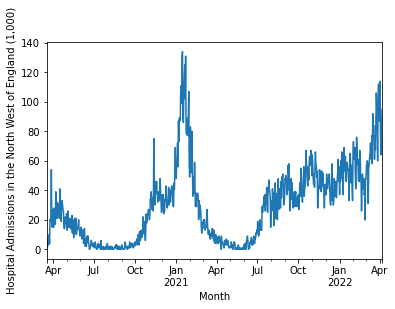

In [54]:
#The graph for covid admissions in the SouthWest

import numpy as np
import pandas as pd
import csv 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation

data = pd.read_csv('merged_data.csv', delimiter=',', parse_dates=True, dayfirst =True, header='infer') #reads data from merged file

dataa_of_SW = data.loc[data['Name'].isin(['South West'])] #.loc allows access to group of rows/columns

print (dataa_of_SW.Name) #double checking

dataa_of_SW

data_of_SW = data.loc[8]  #isolates NW Data

data_of_SW = data_of_SW[1:] # removes 'Name' from index containing dates

data_of_SW.index.name = 'Date'
data_of_SW.columns= ['AdmissionsSW'] #doesn't show up 
data_of_SW

data_SW_graph1 = data_of_SW.transpose()  #transposing rows and column - dont think this is neccesary anymore after moving code aroung

data_SW_graph1.index.name = 'Date'           
data_SW_graph1.columns= ['AdmissionsSW']

#data_SW_graph.rename(columns = {'':'South West'}, inplace = True)

data_SW_graph1.index.name #double checking

data_SW_graph1

from datetime import datetime  

data_SW_graph1.index=pd.to_datetime(data_SW_graph1.index) #changes the dates into 'python' dates
data_SW_graph1 #double checking 

data_SW_graph1.plot()
plt.xlabel('Month')
plt.ylabel('Hospital Admissions in the North West of England (1,000)')
plt.show()


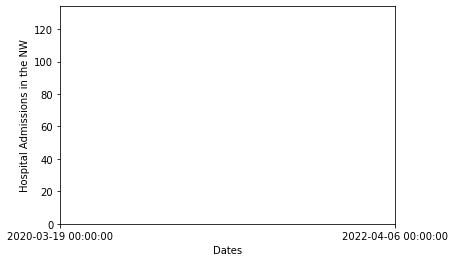

In [49]:
#for the animated graph

from matplotlib.animation import FuncAnimation 
from itertools import count 

data = pd.read_csv('merged_data.csv', delimiter=',', parse_dates=True, dayfirst =True, header='infer')


data1 = data.rename(columns = {"South West":"SWA"}) #rename the column for ease of access
#data_of_SW.columns = ['SW'] 

dataSW = data1.transpose() 

dataSW = dataSW.iloc [:,[8]]


data_of_SW = dataSW[1:]
data_of_SW.index.name = 'Date'

dataSW

data_of_SW.columns = ['SW']

data_of_SW

data_of_SW ['SW']

#x = np.array(data_of_SW.index)
#y = np.array(data_of_SW['SW'])

a = np.array(data_of_SW.index)
b = np.array(data_of_SW['SW'])

x = []  #x and y variables
y = []

fig,ax = plt.subplots()  
ax.plot(x,y)

ax.set_xlim(min(a), max(a))
ax.set_ylim(min(b), max(b))
line, = ax.plot(0,0)

counter = count(0,1)
def animate(i):
    index= next(counter)
    for i in a:
        x.append(i)
    for i in b:
        y.append(i)
    plt.cla()
    ax.plot(x,y)
    
    line.set_xdata(x)
    line.set_ydata(y)
    return line,


#def animate(i=int): #another method
 #   p = ax.plot(data_of_SW.index[:i],data_of_SW['SW'][:i])

animation = FuncAnimation(fig =fig, func =animate, interval=0)
plt.xlabel('Dates')
plt.ylabel('Hospital Admissions in the NW')

plt.show() 